In [1]:
import os
from collections import defaultdict
from functools import partial
from copy import deepcopy

from cmp import run_programs
from matplotlib import pyplot as plt
import numpy as np

ldict = partial(defaultdict, list)

In [2]:
results = run_programs(['sum']) #, executors=['java', 'c++'])

{'data': {'c++': [<Executor c++ [100000]: 0.005679>,
                  <Executor c++ [600000]: 0.006559>,
                  <Executor c++ [1100000]: 0.007460>,
                  <Executor c++ [1600000]: 0.008366>,
                  <Executor c++ [2100000]: 0.009128>],
          'cython': [<Executor cython [100000]: 0.032085>,
                     <Executor cython [600000]: 0.065320>,
                     <Executor cython [1100000]: 0.099119>,
                     <Executor cython [1600000]: 0.129799>,
                     <Executor cython [2100000]: 0.167069>],
          'cython_with_types': [<Executor cython_with_types [100000]: 0.032749>,
                                <Executor cython_with_types [600000]: 0.070993>,
                                <Executor cython_with_types [1100000]: 0.106198>,
                                <Executor cython_with_types [1600000]: 0.146344>,
                                <Executor cython_with_types [2100000]: 0.179795>],
          'java': [<Exe

In [3]:
def group_results(results):
    results = deepcopy(results)
    for program_results in results:
        groupped_results = ldict()
        for executor in program_results['data']:
            compiler = executor.name
            time = executor.time
            arg = executor.args
            groupped_results[compiler].append((int(arg[0]), time))

        for value in groupped_results.values():
            value.sort()
        program_results['data'] = dict(groupped_results)
        
    return results
# groupped_results = group_results(results)
# groupped_results

In [4]:
def plot_result(program, data):
    if not data:
        return

    plt.title('program: %s' % program)

    
    if len(list(data.values())[0]) == 1:
        plt.barh([d[0] for d in data], width=[d[1] for d in data], color=[colors[d[0]] for d in data], )
        plt.xlabel('seconds')
        plt.tight_layout()
    else:
        # print(data)
        for executor, values in data.items():  
            x, y = np.array([(v.args[0], v.time) for v in values]).T
            # print(y, x)
            # y -= y[0]
            plt.plot(x, y, label=executor, color=colors[executor])
        plt.legend() 
    plt.savefig(os.path.join('etc/img/', '%s.png' % program))
    plt.show()

In [5]:
colors = {
    "python": "#008b8b",
    "python2": "#004b4b",
    "pypy2": "#303b3b",
    "nuitka": "#7fff00",
    "cython": "#ffa500",
    "cython_with_types": "#ef9500",
    "c++": "pink",
    "java": "brown",
    "lisp": "cyan",
    "clisp": "cyan",
}

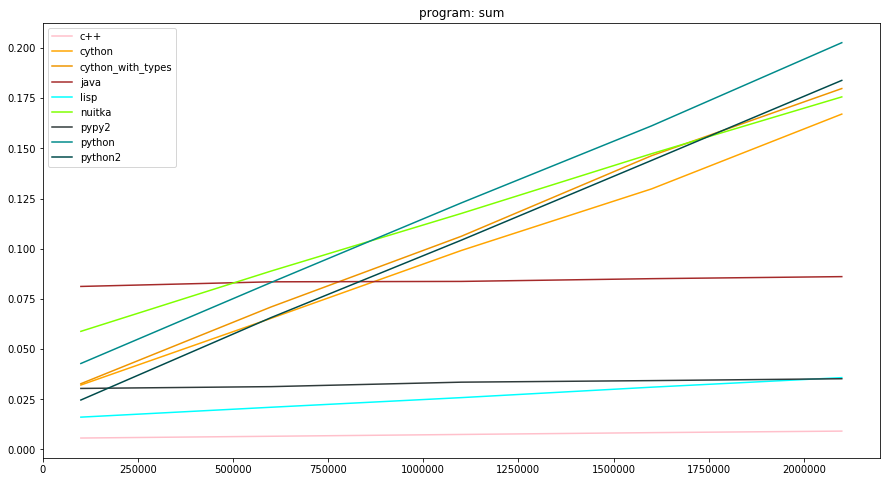

In [11]:
plt.figure(figsize=(15, 8))
for result in results:
    plot_result(**result)